In [176]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import precision_recall_fscore_support as score

In [133]:
dt=pd.read_csv('/content/drive/My Drive/Colab Notebooks/healthcare/heart.csv')
pd.set_option('display.max_colwidth',100)
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [144]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/healthcare/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###checking for independence of predictant variables for logistic regression

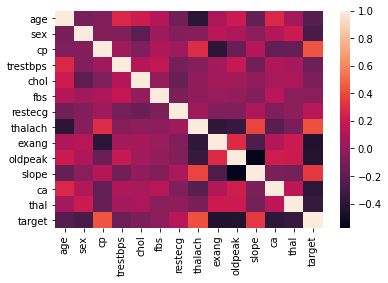

In [177]:
sb.heatmap(df.corr())

## counting the no of observation for logistic regression ,it should be greater than 50 per predictant variables

In [181]:
df.isnull().sum()
#checking for any missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [179]:
df.describe()
#since counts are greater than 50, we can proceed to Logistic regression

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [145]:
X_train,X_test,y_train,y_test=train_test_split(scale(df.drop('target',axis=1)),df['target'],test_size=0.20,random_state=40)
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)


0.8852459016393442

In [154]:
y_predict=lr_model.predict(X_test)
(len(y_predict[y_predict==y_test])/len(y_predict))*100

86.88524590163934

In [155]:
(precision,recall,fscore,support)=score(y_test,y_predict)
print("precision:{} /Recall:{} /Accuracy:{}".format(precision,recall,len(y_predict[y_predict==y_test])/len(y_predict)))

precision:[0.90909091 0.84615385] /Recall:[0.76923077 0.94285714] /Accuracy:0.8688524590163934


In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
#X_train,X_test,y_train,y_test=train_test_split(scale(df.drop('target',axis=1)),df['target'],test_size=0.2)
lr_model=RandomForestClassifier(n_jobs=-1,n_estimators=60,max_depth=4)
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8688524590163934

###comparing prediction and actual value 


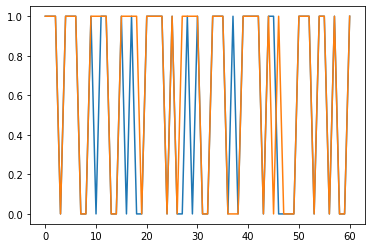

In [174]:
plt.plot(arr)
plt.plot(arr1)    